# Regression

**Goal**: teach computer to predict a numerical value given some input

**Model**. Consider approach based on regression analyis.
[Regression analysis](https://en.wikipedia.org/wiki/Regression_analysis) is a statistical technique to estimate dependence between variables. 
Suppose we have samples $x_n$ of a random value $X$ and the corresponding samples $y_n$ of a random value $Y$.
We assume $Y$ is a function $f$ of $X$ plus an error term independent of $X$:

$$
Y=f(X;\theta)+W.
$$

The function $f$ defines possible relationship between the variables and the parameters $\theta$ controls exact form of the dependence.


**Example 1.** Implement in Python function to sample the function $y=\sin x$ with addition of normally distributed noise. 

In [2]:
import numpy as np
import autograd as ag
import matplotlib.pyplot as plt

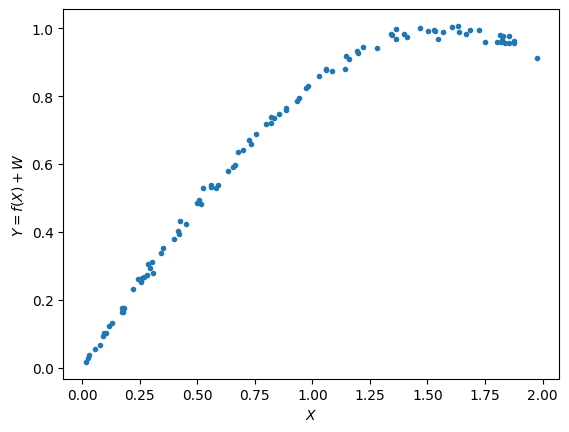

In [3]:
S = 100 # sample size
X = np.random.rand(S)*2 # inicialise X array
# print(f'min X = {np.min(X)}, max X = {np.max(X)}') 

W = np.random.randn(S)*0.01 # initialize noise
Y = np.sin(X) + W # create Y samples as sin function with noise
plt.plot(X,Y, '.') # ploting samples
plt.xlabel('$X$')
plt.ylabel('$Y=f(X)+W$')
plt.show()

**Approaches**. In fact as far as we need to find best function that approximate input, we will solve an optimization problem. Thus we need to define something to optimize. Mainly two functions are used: **loss** and **likelihood** functions.

**Minimum loss function principle**.
Function $f$ is a solution controlled by the parameter $\theta$. The optimal $\theta$ provides the best fitting function. To find optimal value we need to solve optimization problem or find minimum of some error function. Define **Loss function**:

$$
R[x,y] = ||y - f(x,\theta)||^2
$$

The solution of optimisation problem is $\theta_{opt} = \mathrm{argmin}_\theta(L)$

In practice, the estimate of $\theta$ is obtained by the [least squares method](https://en.wikipedia.org/wiki/Least_squares)
from minimization of the mean square error:

$$
R[\theta] = \sum_n (y_n-f(x_n,\theta))^2.
$$

The minimum of $R$ can be found from the necessary condition of optimality, which is sufficient in the case of quadratic functional:

$$
\frac{\partial R}{\partial\theta_k} = 2\sum_n(y_n-f(x_n,\theta_k))\frac{\partial f}{\partial \theta_k}(x_n,\theta) = 0\forall k.
$$

**Example 2.** Implement a function that solve linear least squares method for decomposition of $y$ over polynomials of degree $D$
on the interval $[0,1]$
using Moore-Penrose inverse:

$$
f(x,\theta)=\sum_{k=0}^D \theta_k x^k.
$$ 


In [4]:
def f(x, theta):
  xn = np.power(x, np.arange(len(theta)))
  return np.dot(xn, theta)

# theta =        1, x, x^2,   x^3, x^4,       x^5
theta_optimal = np.array([0, 1,   0,-1/2/3,   0, 1/2/3/4/5])

x0 = 0.1 
print(x0, f(x0,theta_optimal), np.sin(x0))

0.1 0.09983341666666667 0.09983341664682815


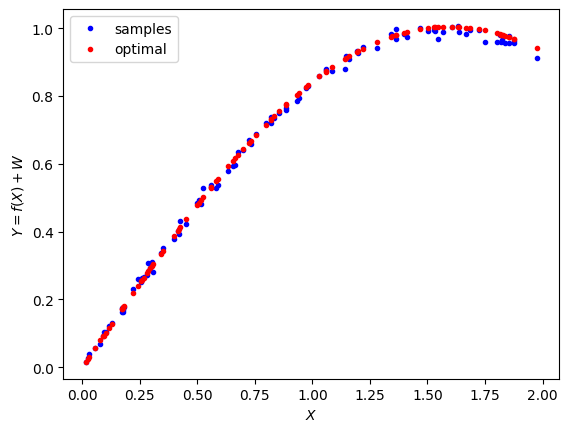

In [5]:
def F(x, D): # basis
  """
  Arguments:
    D - number of parameters.
  """
  return np.power(x[:,None], np.arange(D)[None,:])

def f(x, theta):
  # axis 0 = # sample
  # axis 1 = monomial degree
  xn = F(x, D=len(theta))
  return np.dot(xn, theta)

y_optimal = f(X, theta_optimal)

plt.plot(X,Y, '.b', label='samples')
plt.plot(X,y_optimal, '.r', label='optimal')
plt.xlabel('$X$')
plt.ylabel('$Y=f(X)+W$')
plt.legend()
plt.show()

**Example 3**. Calculate mean square error for obtained solution.

In [6]:
def R(theta, x, y):
  rn = (y - f(x, theta))**2
  return np.sum(rn)

print('Mean square error', R(theta=theta_optimal, x=X, y=Y)/np.sqrt(S) )

Mean square error 0.0016589288491051831


**Maximum likelihood principle**. Another way to approach machine learning problem is a search of maximum of some likelihood function. Likelihood function function is a probability of specific outcome. 
Given probability density $f_W$ for random noise $W$, we can estimate likelihood of outcomes resulting in samples $(x_n,y_n)$.
[Likelihood function](https://en.wikipedia.org/wiki/Likelihood_function) for the continuous destribution can be written as follows:
$$
L(\theta|x,y) = \prod_n f_W(y_n-f(x_n,\theta)). 
$$

$$
\log L(\theta|x,y) = \sum_n \log f_W(y_n-f(x_n,\theta)). 
$$

Maximum of the likelihood function corresponds to the value of $\theta$ such that outcomes $(x_n,y_n)$ are most probable,
thus we obtain the maximum likelihood estimate for the parameters 

$$
\hat\theta = \mathrm{argmax}_\theta \log L(\theta|x,y).
$$

**Problem 1.** Which distribution of $W$ does correspond to least squares method (minimum of mean square error coincides with maximum of likelihood function)?


**Задание 1.** Рассмотрим нормальное распределение: $f_W(t) = c \cdot \exp\left({-\dfrac{t^2}{2\sigma^2}}\right)$

Рассмотрим ММП:

$\ln L\left( \theta | x,y \right) = \sum_n \ln f_W \left( y_n - f(x_n,\theta) \right) = - \dfrac{1}{2\sigma^2}\sum_k \left( y_k - f(x_k,\theta) \right)^2 = - \dfrac{N}{2\sigma^2} R$

При таком распределении шума максимум правдоподобия достигается при минимуме среднеквадратической ошибки

**Training**.
From the point of view of machine learning (ML), the function $R$ is a loss function measuring performance of the artificial neural network (ANN) $f$ with parameters $\theta$. 
The network is used to predict the value of $Y$ given a value of $X$.  
In the context of ML the optimization of $\theta$ above is called training of the algorithm/network.

The simplest method to train an algorithm is the [steepest gradient method](https://en.wikipedia.org/wiki/Gradient_descent).
Given an initial vector of parameters $\theta$, the parameters are updated on each step of optimization by the formula:

$$
\theta\mapsto \theta-\alpha\frac{\partial R}{\partial\theta}[\theta],
$$
until the method converges, i.e. the stop conditions are satisfied, e.g. the loss $R$ is small enough,
or its update $\partial R/\partial \theta$ is small.
The parameter $\alpha$ is learning rate in ML or step size in the numerical methods, it is a metaparameter, i.e. it does not belong to the model, but may affect the result of optimization. 
In the simplest form of the gradient descend the learning rate is constant, however often sofisticated method of variation of $\alpha$ are required 
to stabilze the method or improve convergence, e.g. [Adam method](https://en.wikipedia.org/wiki/Stochastic_gradient_descent#Adam).
Higher order method, such as [LBFGS](https://en.wikipedia.org/wiki/Broyden%E2%80%93Fletcher%E2%80%93Goldfarb%E2%80%93Shanno_algorithm), can also be used to improve convergence, however the methods are used less often.

The number of samples sometimes much larger than required to estimate the direction of optimization reliably,
in the case the extra points only slow down the computation of the gradient.
Therefore [stochastic gradient descent](https://en.wikipedia.org/wiki/Stochastic_gradient_descent) is commonly used in ML instead of the gradient method.
In the method only a subset (batch) of the samples is used to compute the gradient of loss,
the batch is regenerated/resampled after few iterations of optimization. 


The most well-known variant of the least square method is the linear one/linear regression.
In the case prediction function $f$ depends on $\theta$ linearly:

$$
f(x,\theta)=\sum_k f_k(x)\theta_k,
$$
where $f_k$ is a set of predefined functions forming a basis (for instance, in **Example 2** we used the basis of polynomials).
Then optimality conditions takes form of a linear system with respect to $\theta$:

$$
\frac{\partial R}{\partial\theta_k} = 2\sum_n\bigg(y_n-\sum_j f_j(x_n)\theta_j\bigg)f_k(x_n) = 0\forall k.
$$

$$
F^T y - F^T F \theta = 0,
$$
where $F$ is a matrix with elements $F_{nk}=f_k(x_n)$

$$
F^T F \theta=F^T y.
$$
The solution to the problem is given by the [Moore-Penrose inverse](https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_inverse) of the matrix $F$:

$$
\hat \theta=(F^T F)^{-1}(F^T y).
$$ 
Numerically the solution can be computed without computation the square of the matrix $F$ using e.g. [QR-decomposition](https://en.wikipedia.org/wiki/Numerical_methods_for_linear_least_squares).

Unfortunatelly, it is hard to solve least square problem explicitly for dependencies $f$ more complex than linear. 
Hopefully, ML methods can be applied to arbitrary sufficiently smooth functions $f$.

**Example 4**. Implement function to solve least square problem and compere obtained parameter value with optimal one.

In [7]:
def lsq(x, y, D):
  f = F(x, D)
  theta = np.linalg.solve( f.T@f, f.T@y )
  return theta

D = len(theta_optimal)
theta_lsq = lsq(X, Y, D)
print(f'opt: {theta_optimal}')
print(f'lsq: {theta_lsq}')


opt: [ 0.          1.          0.         -0.16666667  0.          0.00833333]
lsq: [-8.16725863e-04  1.04489053e+00 -1.81319064e-01  6.56880579e-02
 -1.22249911e-01  3.06415541e-02]


**Problem 2.** Split the data set $(x_n,y_n)$ to the training set (80%) and testing set (20%) and choose optimal $D$ avoiding overfitting.

In [8]:
def split_data(X, Y, rate = 0.7):
    data = np.vstack((X, Y))
    data = data.T
    np.random.shuffle(data)
    test_rate = (1 - rate) / 2
    train_data = data[:int(len(X) * rate)] 
    test_data = data[int(len(X)*rate):int(len(X)*(rate + test_rate))]
    validate_data = data[int(len(X)*rate + test_rate):]   
    return train_data, test_data, validate_data

In [9]:
train, test, validate = split_data(X, Y)

Найдём оптимальное $D$

In [10]:
import sys
eps = sys.float_info.epsilon

In [11]:
error = np.inf
newErr = 10
D_opt = 1
err_D = []
while (error - newErr) > eps:
    error = newErr
    theta_lsq = lsq(train[:,0], train[:,1], D_opt)
    newErr = R(theta_lsq, validate[:,0], validate[:, 1])
    err_D.append(newErr)
    print(error)
    D_opt += 1
D_opt -= 1
print(theta_lsq)

10
3.769795039974114
0.39410644704169734
0.009168380444879498
0.003777648767020086
0.0036109414310339207
[-0.00432393  1.09204052 -0.30877411  0.19443327 -0.17488443  0.03766589]


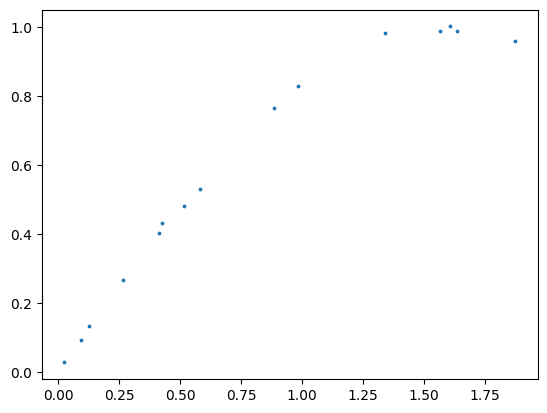

In [12]:
# plt.scatter(test[:,0], f(test[:,0], theta_lsq), s = 3)
plt.scatter(test[:, 0], test[:, 1], s = 3)

In [13]:
print('Оптимальная D = ', D_opt)

Оптимальная D =  6


In [14]:
print(err_D)

[3.769795039974114, 0.39410644704169734, 0.009168380444879498, 0.003777648767020086, 0.0036109414310339207, 0.003656278976212431]


Text(0.5, 0, 'Число параметров')

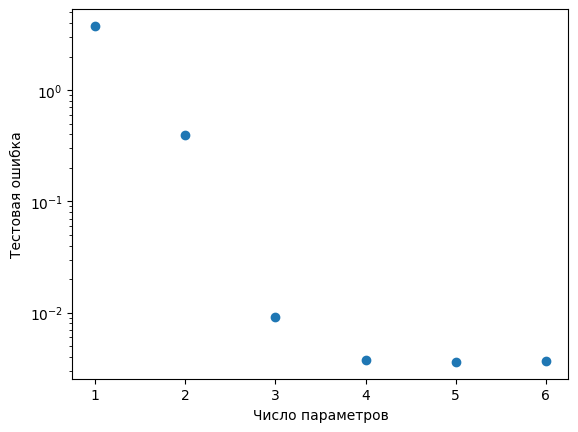

In [15]:
plt.scatter(np.arange(1, D_opt + 1), err_D)
plt.semilogy()
plt.ylabel('Тестовая ошибка')
plt.xlabel('Число параметров')

In the examples above we used explicit results of differentiation but in practice gradient calculation performed by computer. For example, [``autograd``](https://github.com/HIPS/autograd) package is a tool to automatically differentiate native Python and Numpy code.

**Example 5** Create data array, define function and calculate its gradient using autograd

In [16]:
# import autograd as ag
# function that perform scalar product of vectors 'x' with 'n' multiplied by 't'
def f(x,t):
    n = np.arange(x.shape[0]) # create 'n' vector as array of numbers from 0 to length of 'x'
    return np.sum(x*n)*t

x = np.random.randn(10) # take input data as array of 10 random values
t = 15 # parameter
print('f(x,t) =',f(x,t) )
# ag.grad(f,y) - provides a partial derivative of 'f' function with respect 'y' variable  
df = ag.grad(f,0) #define gradient
print('df/dx = ',df(x,t))

f(x,t) = -208.07771715094907
df/dx =  [  0.  15.  30.  45.  60.  75.  90. 105. 120. 135.]


**Note**: autograd works with non integer arrays because you can not differentiate integer data.

There are some assumptions in previous consideration.

Firstly, in **least squares method** we assumed that we have a linear dependence from parameters but in the case of non-linear dependence we also need to use non-linear approximation.

**Problem 3.** Using [``autograd``](https://github.com/HIPS/autograd) package, try another non-linear approximation of $y(x)$, 
e.g. by [rational function](https://en.wikipedia.org/wiki/Rational_function) (see also [Padé approximant](https://en.wikipedia.org/wiki/Pad%C3%A9_approximant)). 

Попробуем разложить по $\{ \sin(nx) \}_{n = 0}^N$

In [17]:
def f_exp(x, theta):
  # axis 0 = # sample
  # axis 1 =  degree
  xn = np.multiply(x[:,None], np.arange(len(theta))[None,:])
  xn = np.sin(xn)
  return np.dot(xn, theta)

In [18]:
def R(theta, x, y):
  rn = (y - f_exp(x, theta))**2
  return np.sum(rn)

In [19]:
train_num = 5

N = 5

cross_train = []
cross_validate = []
# theta_0 = np.random.uniform(1,N,N)
for train_iter in range(5):

    # theta = np.random.uniform(1, N, N) #начальные значения параметров
    theta = np.array([1.0 for k in range(N)])

    error = R(theta, test[:, 0], test[:, 1])
    newErr = error
    lr = 1e-3
    train_error = []
    validate_error = []
    grad = ag.grad(R, 0)
    grad_norm = np.linalg.norm(grad(theta, train[:, 0], train[:, 1]))
    iter = 0
    tol = 1e-3
    while grad_norm >= tol and iter < 100000:
    # while iter < 50:
        grad_vec = grad(theta, train[:, 0], train[:, 1])
        grad_norm = np.linalg.norm(grad_vec)
        theta -= lr * grad_vec
        train_error.append(R(theta, train[:, 0], train[:, 1]))
        newErr = R(theta, validate[:, 0], validate[:, 1])
        validate_error.append(newErr)
        iter += 1
    cross_train.append(train_error)
    cross_validate.append(validate_error)

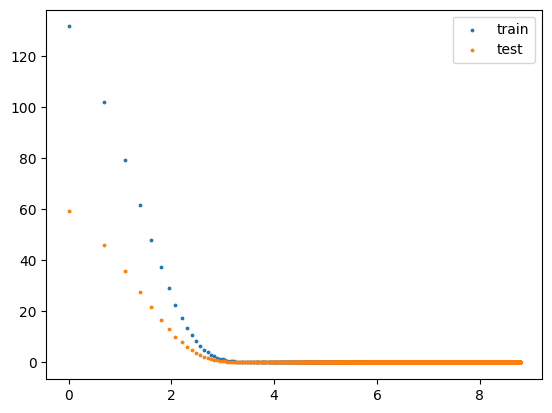

In [20]:
plt.scatter(np.log(np.arange(1, len(train_error) + 1)), train_error, label = 'train', s = 3)
plt.scatter(np.log(np.arange(1, len(train_error) + 1)), validate_error, label = 'test', s = 3)
# plt.semilogy()
plt.legend()

Для каждой итерации:

Обучение

[]

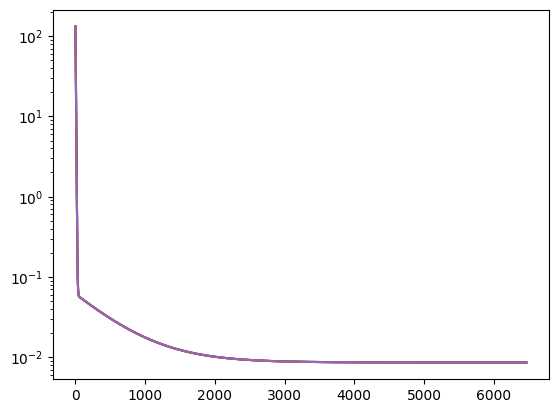

In [38]:
for i in range(train_num):
    plt.plot(np.arange(len(cross_train[i])), cross_train[i])
plt.semilogy()

Валидация

[]

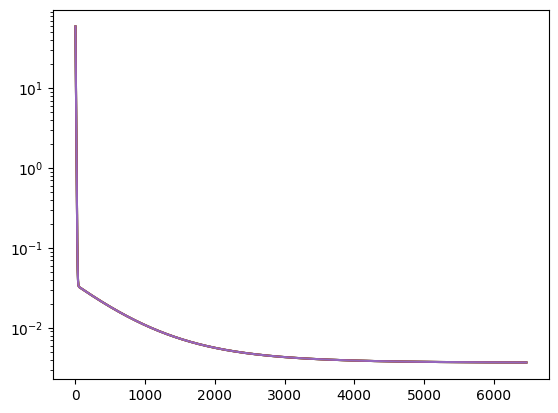

In [39]:
for i in range(train_num):
    plt.plot(np.arange(len(cross_validate[i])), cross_validate[i])
plt.semilogy()

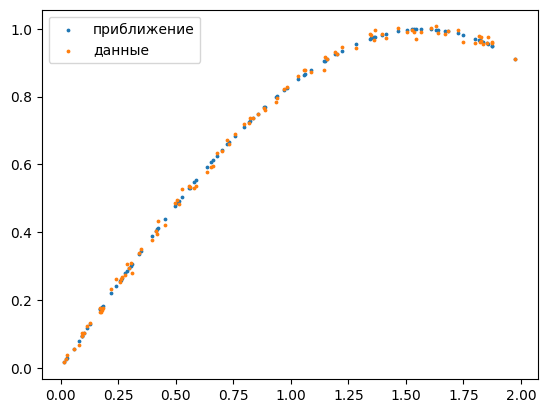

In [23]:
plt.scatter(X, f_exp(X, theta), s = 3, label = 'приближение')
plt.scatter(X, Y, s = 3, label ='данные')
plt.legend()

In [24]:
print(theta)

[ 1.          0.98813792  0.01279879 -0.01149175  0.00778954]


Secondly, we assumed that noise is a random value with normal probability distribution. 
Let p and q are probability distributions of random values 'x' and 'y'. The cross-entropy of this distribution can be defined as
$H(p,q) = -\sum_{x\in X} p(x)\, \log q(x)$

**Problem 4.** Try to use [cross-entropy](https://en.wikipedia.org/wiki/Cross_entropy) as a loss function to evaluate distribution of the error term $W=Y-f(X)$. 
Compare the result with the least squares method. 
Train the method using noise with any not normal probability distribution.

For example:

a) [Student's t-distribution](https://en.wikipedia.org/wiki/Student%27s_t-distribution) for noise $W$: $f_W (x) = \dfrac{\Gamma\left(\dfrac{\nu+1}{2}\right)} {\sqrt{\nu\pi}\,\Gamma\left(\dfrac{\nu}{2}\right)} \left(1+\dfrac{x^2}\nu \right)^{-(\nu+1)/2}$

b) Uniform distribution for noise $ f_W = \dfrac{1}{b-a}$ for $a<x<b$

Попробуем использовать кросс-энтропию как функцию ошибки.

Пусть имеем для точки $(x_i, y_i)$ предсказание $Pr(\hat{y}_i)$. Для регрессии имеем непрерывное распределение, тогда кросс-энтропия для заданной точки (в идеале):

$H_i = - \int\limits_{-\infty}^{+\infty}\delta(y - y_i) \ln Pr_y(\hat{y}_i) dy = - \ln p \left( y_i, \theta \right)$

Теперь суммируем по всем точкам и получим:

$H = - \sum H_i = - \sum \ln p(y_i, \theta)$

Применим этот подход для ошибки:

Подставим, например, гауссовское распределение

$H = - \sum \ln \exp \left( - \dfrac{(y_i - f(x_i, \theta))^2}{2 \sigma^2} \right) = \sum \dfrac{(y_i - f(x_i, \theta))^2}{2 \sigma^2} = \dfrac{N}{2\sigma^2} L \rightarrow \min $

Получили связь со среднеквадратической ошибкой


Попробуем взять распределение, в котором хвосты сходятся медленнее, чем в гауссовском распределении:

$$p(x) = C \cdot \exp\left( - \left| x \cdot \tanh(x) \right| \right)$$

$H = \sum \left| (y_i - f(x_i, \theta)) \cdot \tanh(y_i - f(x_i, \theta)) \right|$

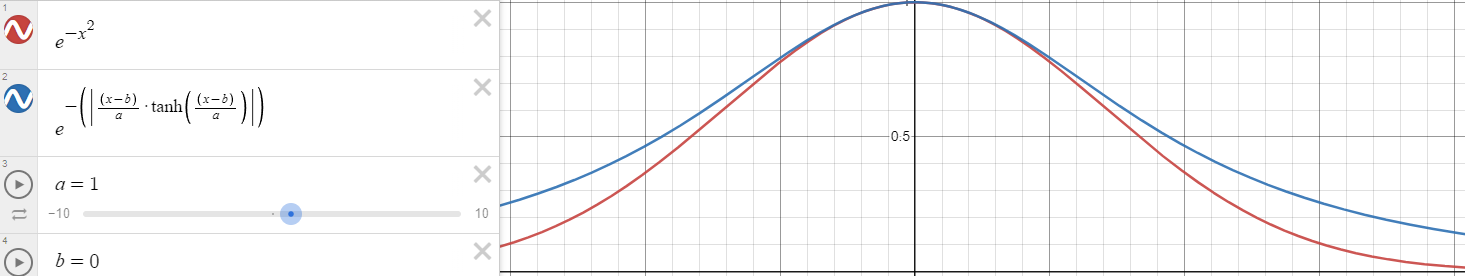

In [25]:
def F(x, D): # basis
  """
  Arguments:
    D - number of parameters.
  """
  return np.power(x[:,None], np.arange(D)[None,:])

def f(x, theta):
  # axis 0 = # sample
  # axis 1 = monomial degree
  xn = F(x, D=len(theta))
  return np.dot(xn, theta)

In [26]:
def cross_entropy(theta, x, y):
    w = y - f(x, theta)
    # rn = np.exp(-1*(w/sigma)**2 / 2) * np.abs(w * np.tanh(w))
    rn = np.abs(w * np.tanh(w))
    return np.sum(rn) / len(rn)

In [27]:
def optimize_entropy(train, test, theta, sigma, alpha, tol=1e-6, maxiter=10000):
  for it in range(maxiter):
    loss = cross_entropy(theta=theta, sigma=sigma, x=x, y=y)
    dR = ag.grad(R, (0, 1))
    dloss = dR(theta, x, y)
    norm_dloss = np.linalg.norm(dloss.flatten())
    if it%100 == 0:
      print(f"{it}: {loss} {norm_dloss}")
    if norm_dloss<tol: return theta
    theta = theta - alpha*dloss
  return theta

In [28]:
max_iter = 100000
sigma = 1.
theta = np.random.uniform(1, 5, 5)
train_error = []
test_error = []
tol = 1e-5
alpha = 1e-3
for it in range(max_iter):
    train_loss = cross_entropy(theta, train[:, 0], train[:, 1])
    test_loss = cross_entropy(theta, test[:, 0], test[:, 1])
    dR = ag.grad(cross_entropy, 0)
    dloss = dR(theta, train[:, 0], train[:, 1])
    norm_dloss = np.linalg.norm(dloss.flatten())
    if it%10000==0:
        print(f"{it}: {train_loss} {norm_dloss}")
        train_error.append(train_loss)
        test_error.append(test_loss)
        
    if norm_dloss<tol: break
    if iter > 10000 * 3 and test_error[-1] > test_error[-2]: break
    theta -= alpha * dloss

0: 14.655982596157436 3.479631388015342
10000: 0.06425231081888257 0.10960794338891161
20000: 0.032736417544137246 0.027295583395211483
30000: 0.026692426374222266 0.023033816529869546
40000: 0.02186310976451951 0.020936696764623983
50000: 0.017876457807595506 0.019005516441801273
60000: 0.014597217220653588 0.017221413565650382
70000: 0.011908795580731466 0.015581245246561744
80000: 0.009710827460793901 0.014079646986656993
90000: 0.007917940811693967 0.012709631580813126


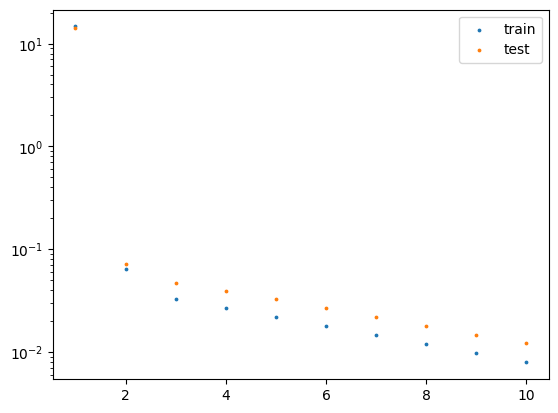

In [29]:
plt.scatter(np.arange(1, len(train_error) +1), train_error,s = 3, label = 'train')
plt.scatter(np.arange(1, len(test_error) +1), test_error,s = 3, label = 'test')
plt.semilogy()
plt.legend()

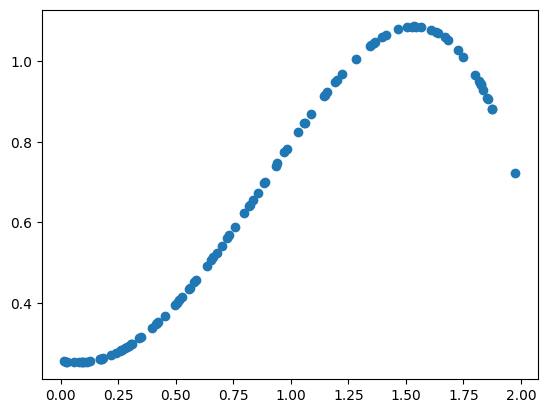

In [30]:
plt.scatter(X, f(X, theta))

Попробуем распределение $C \exp (- |x|)$, это приведёт нас к ошибке MAE

In [31]:
def MAE(theta, x, y):
    w = y - f(x, theta)
    # rn = np.exp(-1*(w/sigma)**2 / 2) * np.abs(w * np.tanh(w))
    rn = np.abs(w)
    return np.sum(rn) / len(rn)

In [32]:
max_iter = 1000000
sigma = 1.
theta = np.random.uniform(1, 5, 5)
train_error = []
test_error = []
tol = 1e-5
alpha = 1e-3
for it in range(max_iter):
    train_loss = cross_entropy(theta, train[:, 0], train[:, 1])
    test_loss = cross_entropy(theta, test[:, 0], test[:, 1])
    dR = ag.grad(cross_entropy, 0)
    dloss = dR(theta, train[:, 0], train[:, 1])
    norm_dloss = np.linalg.norm(dloss.flatten())
    if it%10000==0:
        print(f"{it}: {train_loss} {norm_dloss}")
        train_error.append(train_loss)
        test_error.append(test_loss)
        
    if norm_dloss<tol: break
    theta -= alpha * dloss

0: 24.075492226169754 3.459123353307887
10000: 0.0009241608405344591 0.005664241264594656
20000: 0.000843085167203649 0.0015810574197128576
30000: 0.0008214251846185076 0.00139303410339536
40000: 0.0008037445463238981 0.001267992516042379
50000: 0.0007890558995688067 0.0011573316825276754
60000: 0.0007767850331376424 0.0010594457847606625
70000: 0.0007664690703190688 0.0009731207340689611
80000: 0.0007577339832853685 0.0008972517127038975
90000: 0.0007502775443951844 0.0008308267005691868
100000: 0.0007438555497314507 0.0007729132932242937
110000: 0.0007382706834396277 0.0007226476428098882
120000: 0.0007333635174970142 0.00067922579679196
130000: 0.0007290052379834185 0.0006418975855733784
140000: 0.0007250917670362591 0.0006099629873111471
150000: 0.0007215390129327009 0.0005827706299779556
160000: 0.0007182790319486669 0.0005597178473332743
170000: 0.0007152569270806074 0.0005402515581791847
180000: 0.0007124283422350903 0.0005238692295564127
190000: 0.0007097574375990195 0.00051011

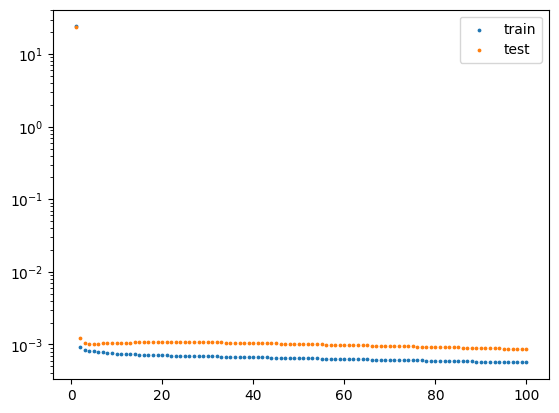

In [33]:
plt.scatter(np.arange(1, len(train_error) +1), train_error,s = 3, label = 'train')
plt.scatter(np.arange(1, len(test_error) +1), test_error,s = 3, label = 'test')
plt.semilogy()
plt.legend()

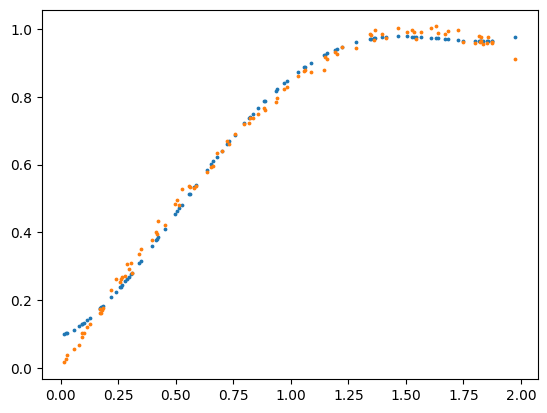

In [34]:
plt.scatter(X, f(X, theta), s =3, label= 'pred')
plt.scatter(X, Y, s=3, label='data')

**Quick recap**
1) Define model
2) Separate data on training and testing parts
3) Calculate gradient (for example, using autograd)
4) Optimize 
5) Check overfitting (for example cross-validation)

**Example 6** Find optimal value of parameter $\theta$ where minimum of Loss function $R(x,y,\theta)$ is achieved using autograd.

Here we will use loss function from **Example 3** defined as a mean square error.
We start from definition of a gradient and then introduce optimization function

In [35]:
dR = ag.grad(fun=R, argnum=0)
# print( R(theta_optimal, X, Y) )
print( dR(theta_optimal, X, Y) )
print( dR(theta_lsq, X, Y) )

[  0.           3.75290436  -9.49971439 -17.52893163  -6.79418646
   1.43597287]
[  0.          -9.67673003 -10.43848765  -7.17552733  -6.1594182
  -4.46021963]


In [36]:
theta0 = theta_optimal

def optimize(x,y, theta, alpha, tol=1e-6, maxiter=10000):
  for it in range(maxiter):
    loss = R(theta=theta, x=x, y=y)
    dloss = dR(theta, x, y)
    norm_dloss = np.linalg.norm(dloss.flatten())
    if it%100 == 0:
      print(f"{it}: {loss} {norm_dloss}")
    if norm_dloss<tol: return theta
    theta = theta - alpha*dloss
  return theta

In [37]:
theta0 = optimize(x=X, y=Y, theta=theta0, alpha=5e-5)
print(theta0)

0: 1.485593590948534 21.44330423451571
100: 0.3299966912450164 9.74994822605292
200: 0.08540369144153843 4.571981572034915
300: 0.030489837761343137 2.2012752460720013
400: 0.017544946368672196 1.0821218644601522
500: 0.014376247055546331 0.5404632247580262
600: 0.013577532294208204 0.27356629353009737
700: 0.013370492979803486 0.1407989271737433
800: 0.013314393094832157 0.07506620767101718
900: 0.013297481470612568 0.04371704375262861
1000: 0.013290940772990496 0.03016872470020455
1100: 0.013287231915496777 0.02506259234508172
1200: 0.01328434849897257 0.023244680710687974
1300: 0.013281740342824267 0.02252538893734591
1400: 0.013279246676443573 0.022171509055221836
1500: 0.013276813984121628 0.021957482234928428
1600: 0.013274420249142488 0.02181044909356958
1700: 0.013272054006663753 0.021702722564644592
1800: 0.013269708163299105 0.021621029056085362
1900: 0.013267377914195612 0.0215575588925628
2000: 0.01326505987430174 0.02150712712184183
2100: 0.013262751621186954 0.02146609832